In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.9 MB/s eta 0:00:00


In [2]:
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = pd.read_excel('/content/1. 스마트스토어_판매성과_2022-01-01_2022-06-30 (1).xlsx')
df_2 = pd.read_excel('/content/1. 스마트스토어_판매성과_2022-07-01_2022-12-31 (1).xlsx')
df_3 = pd.read_excel('/content/1. 스마트스토어_판매성과_2023-01-01_2023-05-31 (1).xlsx')
df_4 = pd.read_excel('/content/판매성과_2023-06-01_2023-06-30.xlsx')
df = pd.concat([df_1,df_2,df_3,df_4])

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
#df = pd.read_excel('/content/ss_판매성과.xlsx')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 0 to 848
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            2490 non-null   object 
 1   요일            2490 non-null   object 
 2   시간대           2490 non-null   object 
 3   결제자수          2490 non-null   int64  
 4   결제수           2490 non-null   int64  
 5   모바일비율(결제건수)   2440 non-null   float64
 6   결제금액          2490 non-null   int64  
 7   모바일비율(결제금액)   2440 non-null   float64
 8   결제당 결제금액      2440 non-null   float64
 9   결제상품수량        2490 non-null   int64  
 10  결제당 상품수량      2440 non-null   float64
 11  배송비           2490 non-null   int64  
 12  쿠폰합계          2490 non-null   int64  
 13  상품쿠폰          2490 non-null   int64  
 14  주문쿠폰          2490 non-null   int64  
 15  환불건수          2490 non-null   int64  
 16  환불금액          2490 non-null   int64  
 17  환불비율(결제금액)    2440 non-null   float64
 18  환불수량          2490 non-null  

In [4]:
# 쿠폰 발급한 2023년 3월 데이터 부터
cp_df = df[df['날짜'] >= '2023-03-01']

In [6]:
df['날짜'] = pd.to_datetime(df['날짜'])
cp_df['날짜'] = pd.to_datetime(cp_df['날짜'])

<ipython-input-6-7396968bee40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_df['날짜'] = pd.to_datetime(cp_df['날짜'])


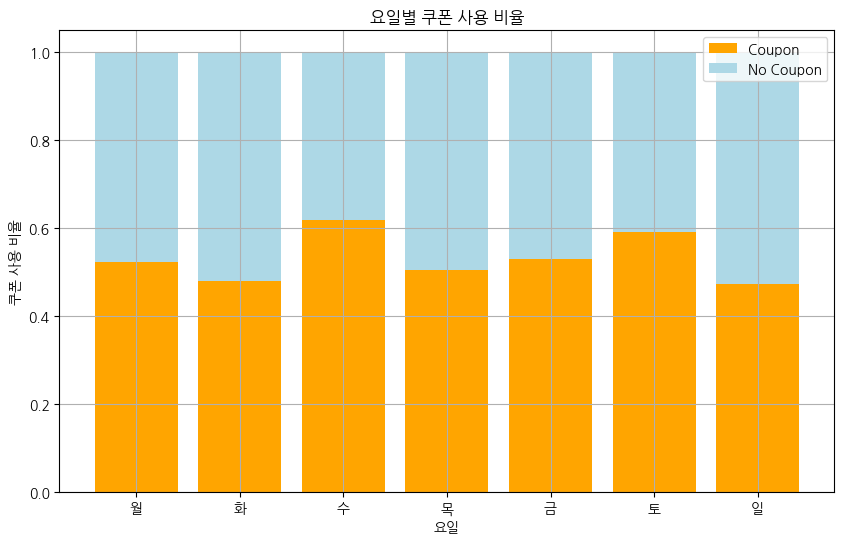

In [79]:
coupon_used_df = cp_df[cp_df['쿠폰합계'] != 0]


total_orders_by_day = cp_df.groupby('요일').size()
coupon_usage_by_time = coupon_used_df.groupby('요일').size()
coupon_usage_rate = coupon_usage_by_time / total_orders_by_day


weekday_order = ['월', '화', '수', '목', '금', '토', '일']


coupon_usage_rate = coupon_usage_rate.reindex(weekday_order)
no_coupon_rate = 1 - coupon_usage_rate

# Create a stacked bar plot showing the coupon usage rate and the proportion of orders that did not use a coupon
plt.figure(figsize=(10, 6))
plt.bar(weekday_order, coupon_usage_rate, label='Coupon', color='orange')
plt.bar(weekday_order, no_coupon_rate, bottom=coupon_usage_rate, label='No Coupon', color='lightblue')
plt.xlabel('요일')
plt.ylabel('쿠폰 사용 비율')
plt.title('요일별 쿠폰 사용 비율')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

coupon_used_df = cp_df[cp_df['쿠폰합계'] != 0]

# Convert '날짜' column to datetime format and set it as index
cp_df['날짜'] = pd.to_datetime(cp_df['날짜'])
cp_df.set_index('날짜', inplace=True)

# Set the '날짜' column of coupon_used_df as datetime index
coupon_used_df['날짜'] = pd.to_datetime(coupon_used_df['날짜'])
coupon_used_df.set_index('날짜', inplace=True)


In [17]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 168
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   날짜            780 non-null    datetime64[ns]
 1   요일            780 non-null    object        
 2   시간대           780 non-null    object        
 3   결제자수          780 non-null    int64         
 4   결제수           780 non-null    int64         
 5   모바일비율(결제건수)   766 non-null    float64       
 6   결제금액          780 non-null    int64         
 7   모바일비율(결제금액)   766 non-null    float64       
 8   결제당 결제금액      766 non-null    float64       
 9   결제상품수량        780 non-null    int64         
 10  결제당 상품수량      766 non-null    float64       
 11  배송비           780 non-null    int64         
 12  쿠폰합계          780 non-null    int64         
 13  상품쿠폰          780 non-null    int64         
 14  주문쿠폰          780 non-null    int64         
 15  환불건수          780 non-null    int64     

In [9]:
cp_df['날짜'] = pd.to_datetime(cp_df['날짜'])
cp_df['월'] = cp_df['날짜'].dt.month

<ipython-input-9-068332c6a011>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_df['날짜'] = pd.to_datetime(cp_df['날짜'])
<ipython-input-9-068332c6a011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_df['월'] = cp_df['날짜'].dt.month


In [10]:
cp_df.groupby(['월']).size()


월
3    173
4    217
5    221
6    169
dtype: int64

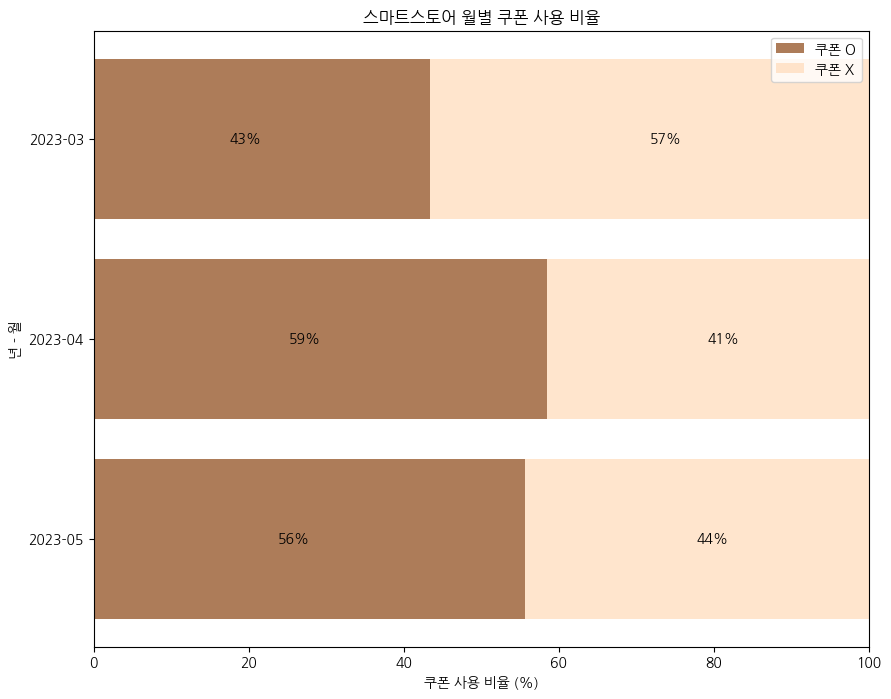

In [150]:
coupon_used_df = cp_df[cp_df['쿠폰합계'] != 0]

# 월별 데이터
total_orders_by_month = cp_df.groupby(['월']).size()
coupon_usage_by_month = coupon_used_df.groupby(['월']).size()

# 쿠폰사용비율
coupon_usage_rate = coupon_usage_by_month / total_orders_by_month * 100
no_coupon_rate = 100 - coupon_usage_rate

month_order = ['2023-05', '2023-04', '2023-03']


plt.figure(figsize=(10, 8))
bars1 = plt.barh(month_order, coupon_usage_rate[::-1], label='쿠폰 O', color='saddlebrown', alpha=0.7)
bars2 = plt.barh(month_order, no_coupon_rate[::-1], left=coupon_usage_rate[::-1], label='쿠폰 X', color='peachpuff', alpha=0.7)

plt.xlabel('쿠폰 사용 비율 (%)')
plt.ylabel('년 - 월')
plt.title('스마트스토어 월별 쿠폰 사용 비율')
plt.xlim(0, 100)

# 퍼센트 계산
for bar1, bar2 in zip(bars1, bars2):
    width1 = bar1.get_width()
    width2 = bar2.get_width()
    if width1 == 0:
        plt.text(width2 / 2., bar1.get_y() + bar1.get_height() / 2., f"{int(round(width2))}%",
                 ha='left', va='center', fontsize=10, color='black')
    elif width2 == 0:
        plt.text(width1 / 2., bar2.get_y() + bar2.get_height() / 2., f"{int(round(width1))}%",
                 ha='right', va='center', fontsize=10, color='black')
    else:
        plt.text(width1 / 2., bar1.get_y() + bar1.get_height() / 2., f"{int(round(width1))}%",
                 ha='right', va='center', fontsize=10, color='black')
        plt.text(width1 + width2 / 2., bar2.get_y() + bar2.get_height() / 2., f"{int(round(width2))}%",
                 ha='left', va='center', fontsize=10, color='black')

plt.legend()
plt.show()
